In [1]:
from keras.datasets.mnist import load_data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test) = load_data()

In [3]:
# Normalize the data
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [4]:
# Reshape
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# Label Encoding 
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
# The Model
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [7]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)


In [8]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [9]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [10]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [11]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
240/240 [==============================] - 59s 245ms/step - loss: 0.9514 - accuracy: 0.6798 - val_loss: 0.1588 - val_accuracy: 0.9557
Epoch 2/10
240/240 [==============================] - 58s 243ms/step - loss: 0.3760 - accuracy: 0.8808 - val_loss: 0.0990 - val_accuracy: 0.9686
Epoch 3/10
240/240 [==============================] - 59s 245ms/step - loss: 0.2843 - accuracy: 0.9108 - val_loss: 0.0696 - val_accuracy: 0.9763
Epoch 4/10
240/240 [==============================] - 58s 243ms/step - loss: 0.2403 - accuracy: 0.9255 - val_loss: 0.0665 - val_accuracy: 0.9781
Epoch 5/10
240/240 [==============================] - 59s 246ms/step - loss: 0.2118 - accuracy: 0.9341 - val_loss: 0.0511 - val_accuracy: 0.9829
Epoch 6/10
240/240 [==============================] - 58s 244ms/step - loss: 0.1922 - accuracy: 0.9406 - val_loss: 0.0464 - val_accuracy: 0.9834
Epoch 7/10
240/240 [==============================] - 59s 247ms/step - loss: 0.1757 - accuracy: 0.9456 - val_loss: 0.0429 - val_ac

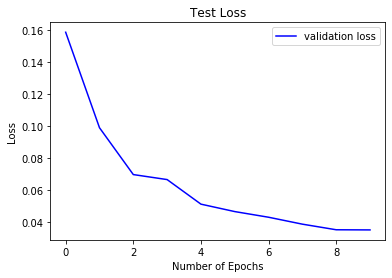

In [12]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

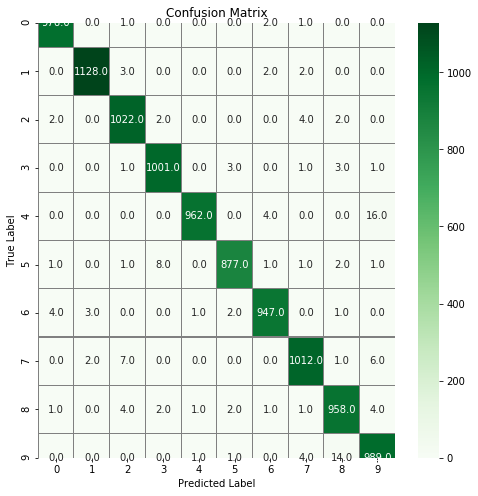

In [14]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()